In [25]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def generate(n, w_max, N):
    y = [0 for _ in range(N)]
    x = [i * 0.0001 for i in range(N)]
    w = w_max / n
    for i in range(n):
        w0 = w * (1 + i)
        A = random.random()
        fi = random.random()
        for t in range(N):
            y[t] += A * math.sin(w0 * x[t] + fi)
    return (x, y)


In [27]:
n = 12
w_max = 2700
N = 512

In [28]:
x, signal = generate(n,w_max, N)

In [29]:
def FFT_vectorized(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("Размер должен быть степенью 2")

    N_min = min(N, 32)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1]//2]
        X_odd = X[:, X.shape[1]//2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

In [30]:
signal = np.array(signal)
res = FFT_vectorized(signal)

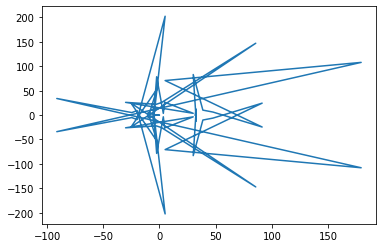

In [31]:
fig, ax = plt.subplots()  # Комплексная
ax.plot(res.real, res.imag)

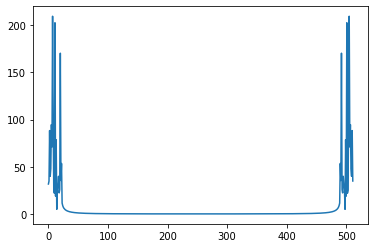

In [32]:
fig, ax = plt.subplots() # Возьмем модуль векторов
ax.plot(abs(res))

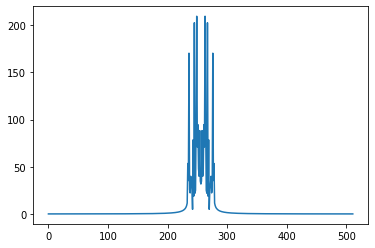

In [33]:
a = abs(res)
res_shift = np.fft.fftshift(res) # Зеркальный сдвиг относительно нулевой частоты - спектр в привычном виде
fig, ax = plt.subplots() 
ax.plot(abs(res_shift))